### 1: Importar librerías y generar las ciudades

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
# Generamos 15 ciudades aleatorias (coordenadas X, Y)
num_cities = 15
cities = np.random.rand(num_cities, 2) * 100  # coordenadas entre 0 y 100

# Función para calcular la distancia total de una ruta
def total_distance(route, cities):
    dist = 0
    for i in range(len(route)):
        dist += np.linalg.norm(cities[route[i]] - cities[route[(i + 1) % len(route)]])
    return dist

**Explicación**:

	•	Cada ciudad tiene coordenadas (x, y).
	•	total_distance() suma las distancias euclidianas entre ciudades consecutivas, cerrando el ciclo.

### 2: Graficar las ciudades y una ruta dada

In [4]:
def plot_route(cities, route, title):
    plt.figure(figsize=(8, 6))
    for i in range(len(route)):
        cityA = cities[route[i]]
        cityB = cities[route[(i + 1) % len(route)]]
        plt.plot([cityA[0], cityB[0]], [cityA[1], cityB[1]], 'b-', alpha=0.7)
        plt.scatter(cityA[0], cityA[1], c='red')
        plt.text(cityA[0] + 1, cityA[1] + 1, str(route[i]), fontsize=9)
    plt.title(title)
    plt.show()

**Explicación**:

	•	Conecta las ciudades siguiendo el orden de la ruta.
	•	Muestra la ruta como líneas azules con puntos rojos en las ciudades.

### 3: Generar la ruta inicial y visualizarla

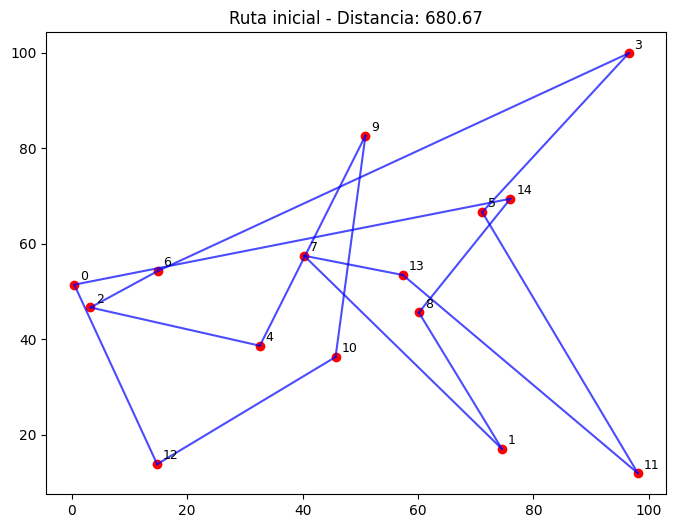

In [5]:
# Ruta inicial aleatoria
current_route = list(range(num_cities))
random.shuffle(current_route)

# Distancia inicial
current_distance = total_distance(current_route, cities)

# Graficamos la ruta inicial
plot_route(cities, current_route, f"Ruta inicial - Distancia: {current_distance:.2f}")

**Explicación**:

	•	Empezamos con una solución completamente aleatoria.
	•	Es importante visualizar el punto de partida antes de mejorar.

### 4: Recocido Simulado

In [6]:
def simulated_annealing(cities, initial_route, T=1000, alpha=0.995, stopping_T=1e-3):
    current_route = initial_route.copy()
    current_distance = total_distance(current_route, cities)
    best_route = current_route.copy()
    best_distance = current_distance

    distances = [current_distance]

    while T > stopping_T:
        # Crear vecino (intercambiar 2 ciudades)
        new_route = current_route.copy()
        i, j = random.sample(range(len(new_route)), 2)
        new_route[i], new_route[j] = new_route[j], new_route[i]

        new_distance = total_distance(new_route, cities)
        delta = new_distance - current_distance

        # Decidir si aceptar
        if delta < 0 or random.random() < math.exp(-delta / T):
            current_route = new_route
            current_distance = new_distance

            if current_distance < best_distance:
                best_route = current_route
                best_distance = current_distance

        distances.append(best_distance)
        T *= alpha  # enfriar

    return best_route, best_distance, distances

**Explicación**:

	•	T → temperatura inicial (nivel de exploración).
	•	alpha → factor de enfriamiento (reduce T lentamente).
	•	En cada iteración:
	  •	Se intercambian dos ciudades.
	  •	Si la nueva ruta mejora → se acepta.
	  •	Si es peor → se acepta con cierta probabilidad.
	  •	Guardamos la mejor ruta encontrada.

### 5: Ejecutar el algoritmo y mostrar resultados

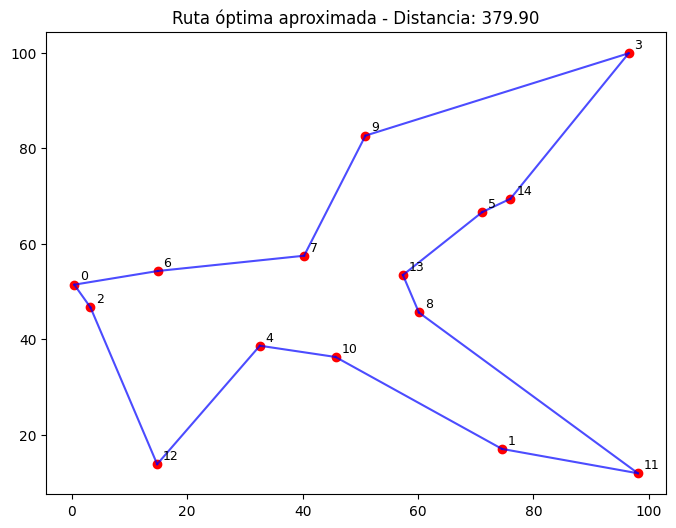

In [8]:
best_route, best_distance, distances = simulated_annealing(cities, current_route)

# Graficar la ruta final
plot_route(cities, best_route, f"Ruta óptima aproximada - Distancia: {best_distance:.2f}")

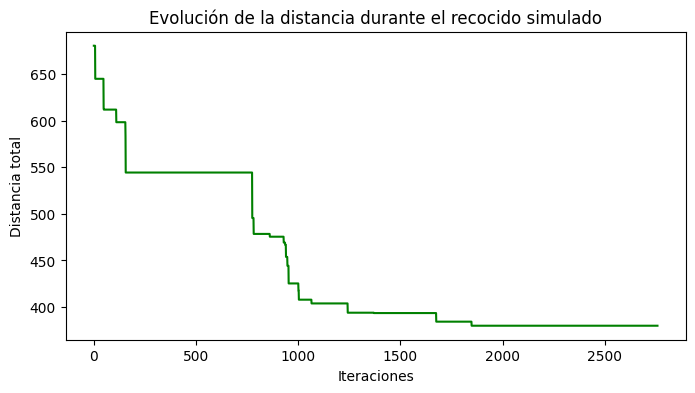

In [9]:
# Graficar la evolución de la distancia
plt.figure(figsize=(8,4))
plt.plot(distances, color='green')
plt.title("Evolución de la distancia durante el recocido simulado")
plt.xlabel("Iteraciones")
plt.ylabel("Distancia total")
plt.show()

**Explicación**:

	•	Mostramos la mejor ruta encontrada visualmente.
	•	Luego graficamos cómo la distancia disminuyó conforme el algoritmo “se enfrió”.

### PARTE 4: ANÁLISIS DE RESULTADOS

Lo que se observa:

	•	La ruta inicial era aleatoria y poco eficiente.
	•	El recocido simulado va encontrando rutas cada vez más cortas.
	•	Al final, la ruta final no es necesariamente la óptima global, pero suele ser muy cercana al óptimo.